# The Sparks Foundation

## Ishwari Pawar

DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION

Dataset:SampleSuperstore.csv(https://bit.ly/2TK5Xn5)

### #Task4-Exploratory Data Analysis - Terrorism

In [8]:
from warnings import filterwarnings as w
w('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set(style='darkgrid', context='talk',      
        palette=['#62C370', '#FFD166', '#EF476F'])

In [10]:
dataset = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1') 
data = dataset.copy()

In [11]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [12]:
data.shape

(181691, 135)

In [13]:
nul = []
for i in data.columns:
    if data[i].isna().sum()>0:
        nul.append(i)
len(nul)

106

In [15]:
for i in nul:
    data.drop(i,axis=1,inplace=True)
data.shape

(181691, 29)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   extended         181691 non-null  int64 
 5   country          181691 non-null  int64 
 6   country_txt      181691 non-null  object
 7   region           181691 non-null  int64 
 8   region_txt       181691 non-null  object
 9   vicinity         181691 non-null  int64 
 10  crit1            181691 non-null  int64 
 11  crit2            181691 non-null  int64 
 12  crit3            181691 non-null  int64 
 13  success          181691 non-null  int64 
 14  suicide          181691 non-null  int64 
 15  attacktype1      181691 non-null  int64 
 16  attacktype1_txt  181691 non-null  object
 17  targtype1 

In [17]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,0.068297,0.988530,0.993093,0.875668,0.889598,0.036507,3.247547,8.439719,0.002950,6.447325,-0.544556,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.284553,0.106483,0.082823,0.329961,0.313391,0.187549,1.915772,6.653838,0.054234,2.173435,3.122889,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000,5.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,0.000000,6.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,14.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Visualisation

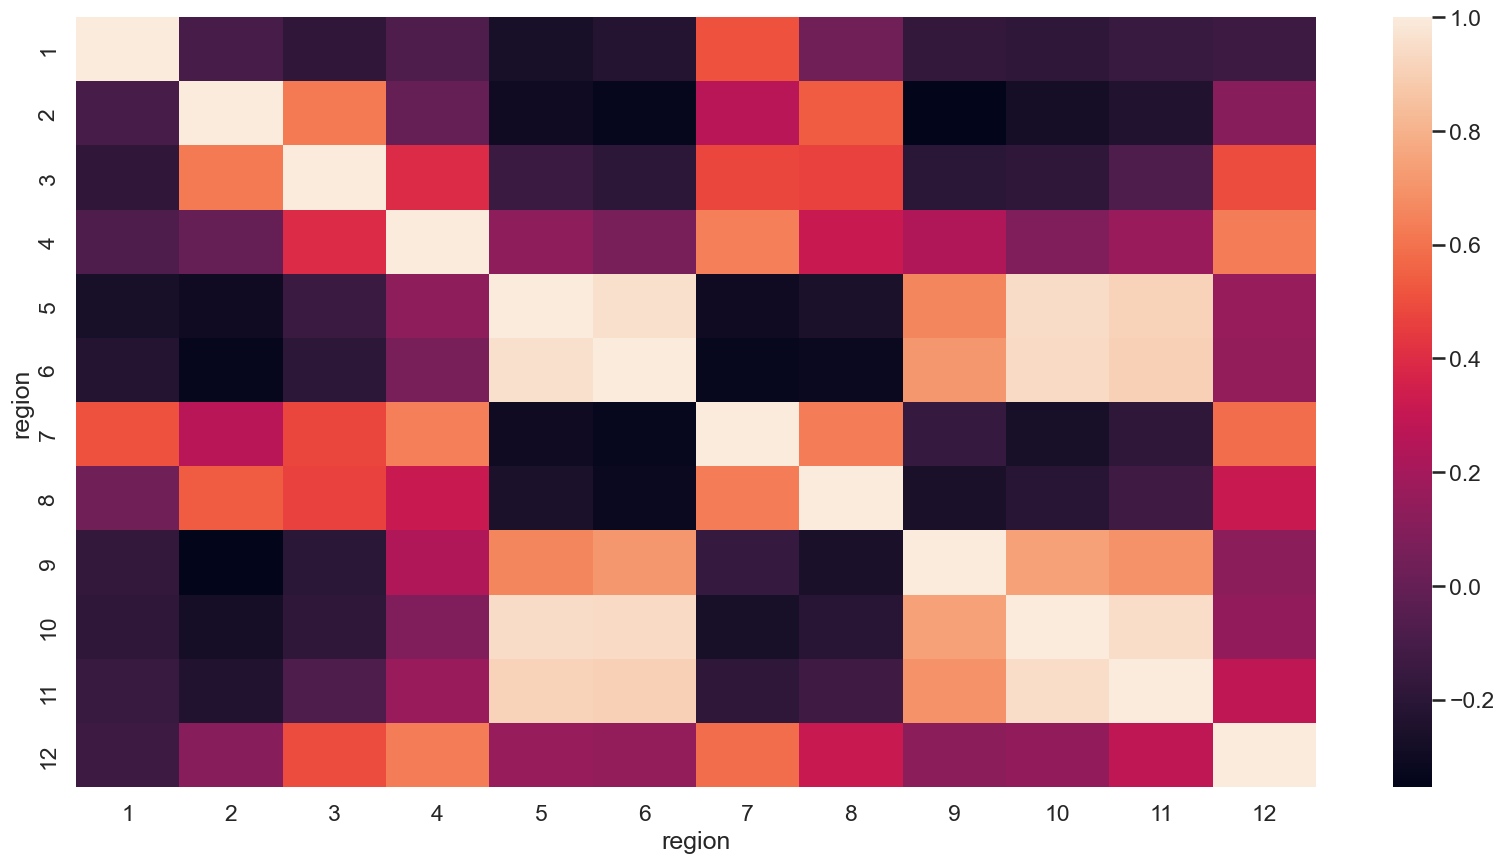

In [36]:
fig,axes=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df.corr())
plt.show()

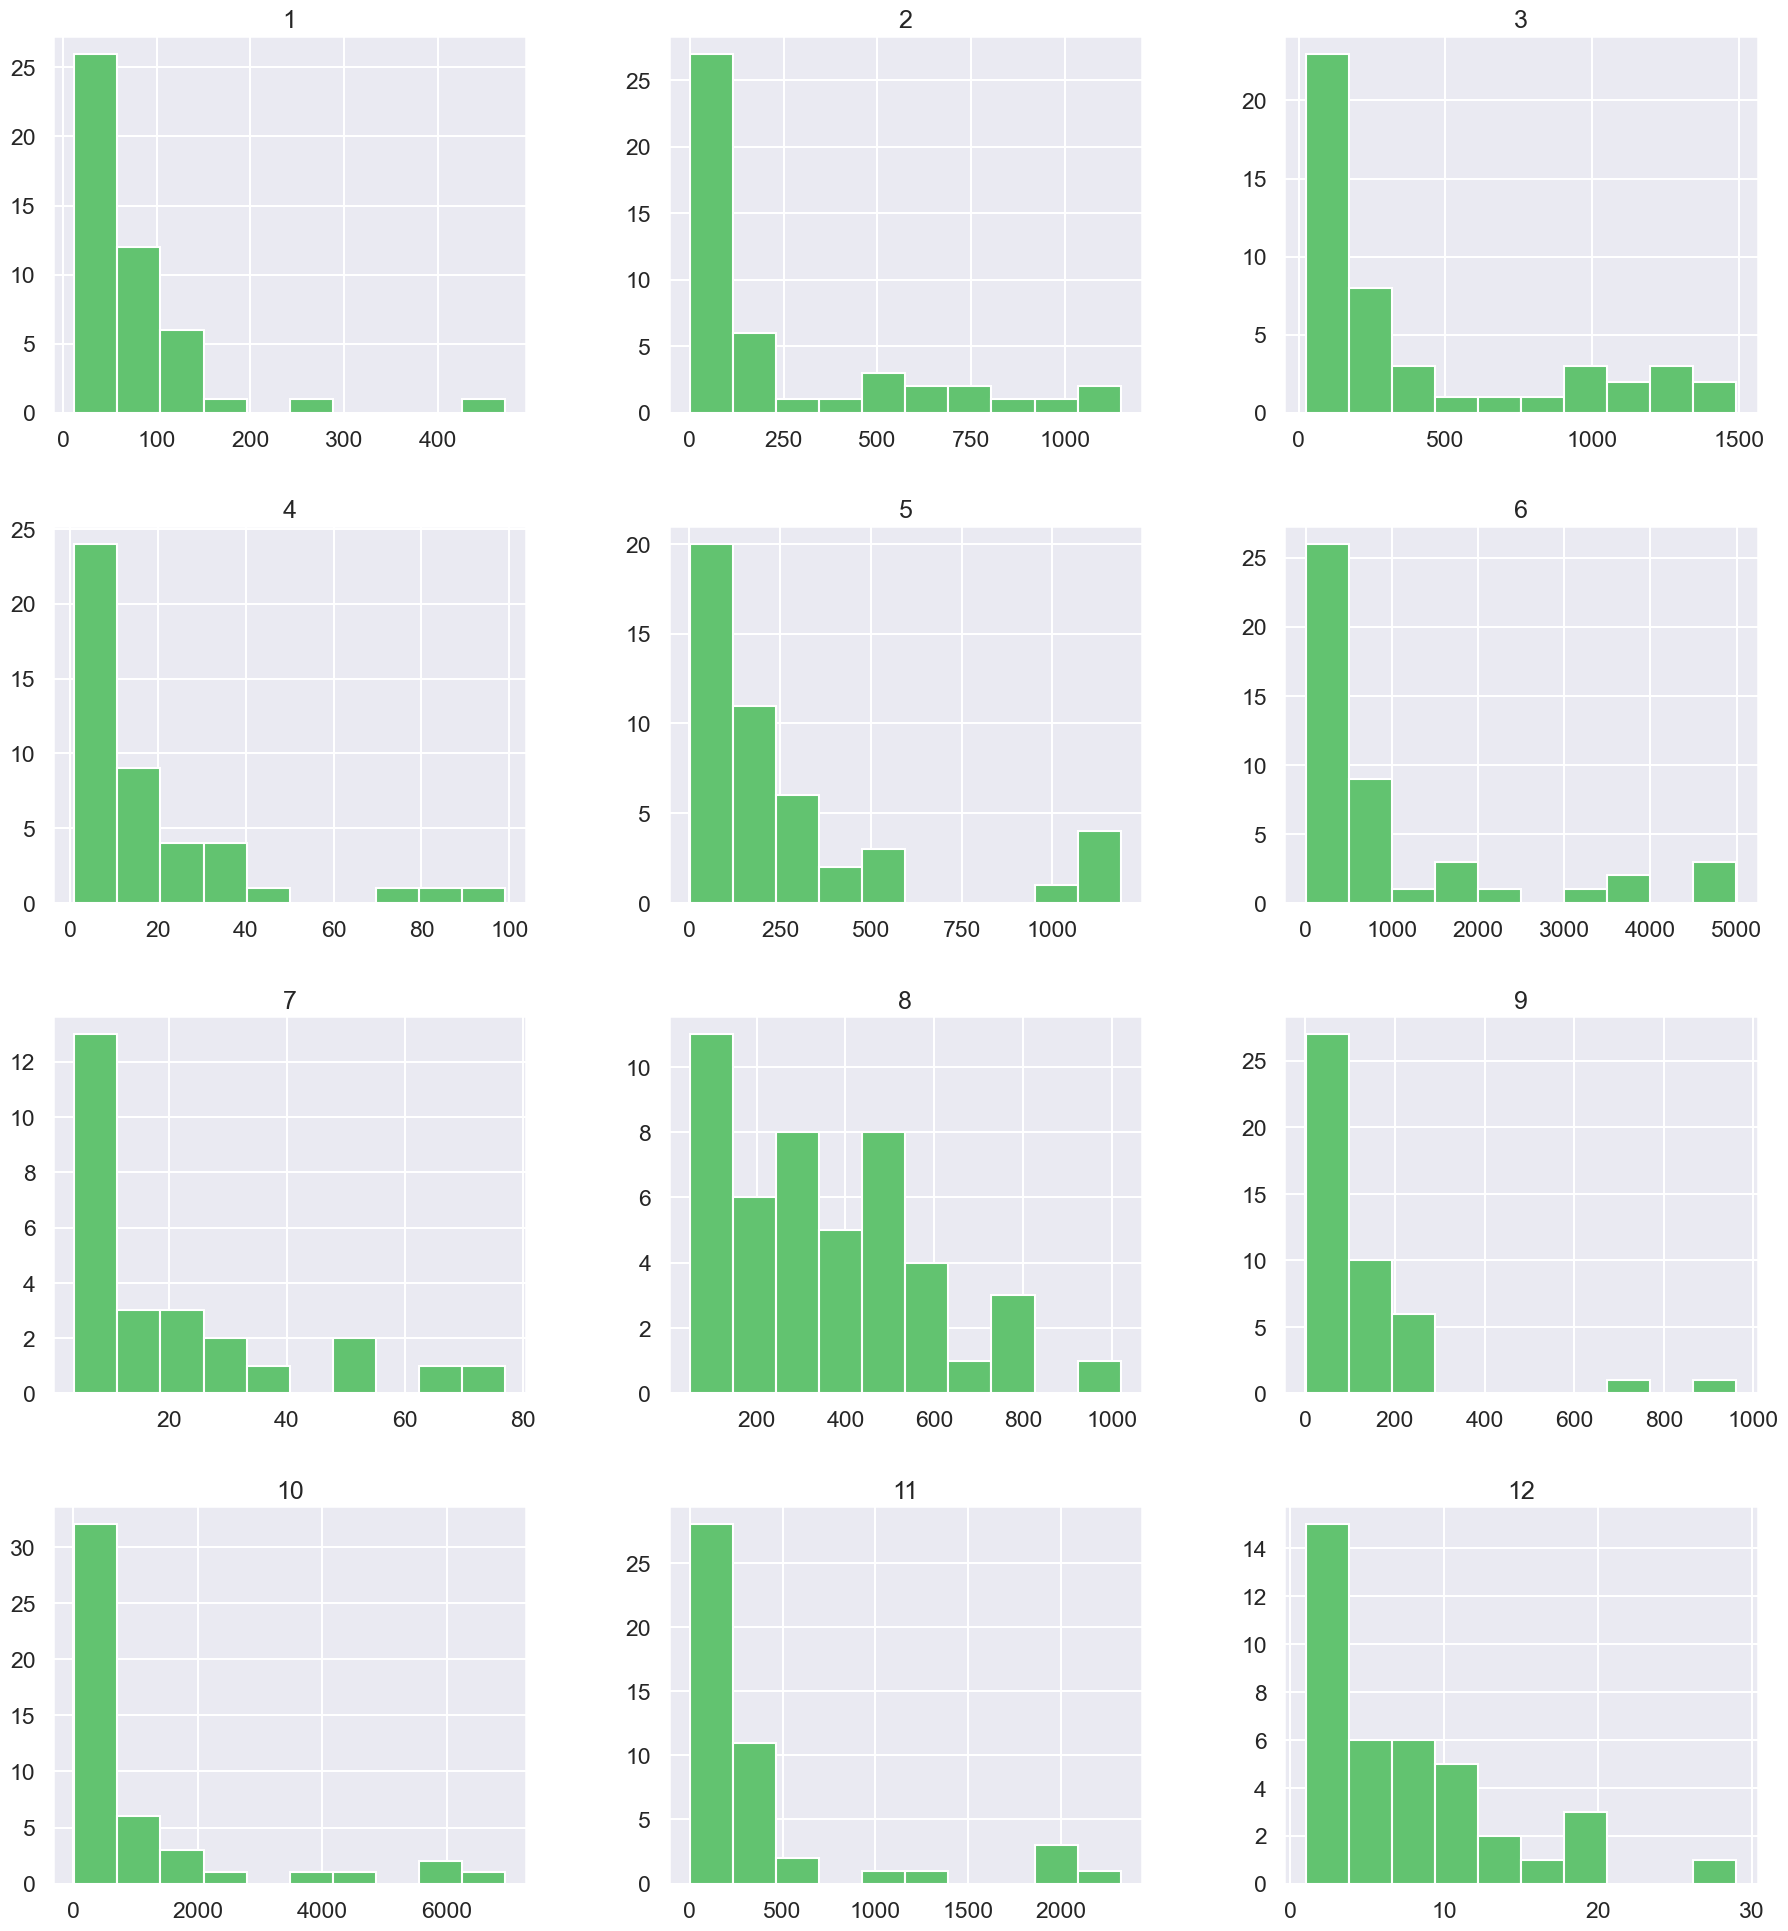

In [37]:
df.hist(figsize=(22,24))
plt.show()

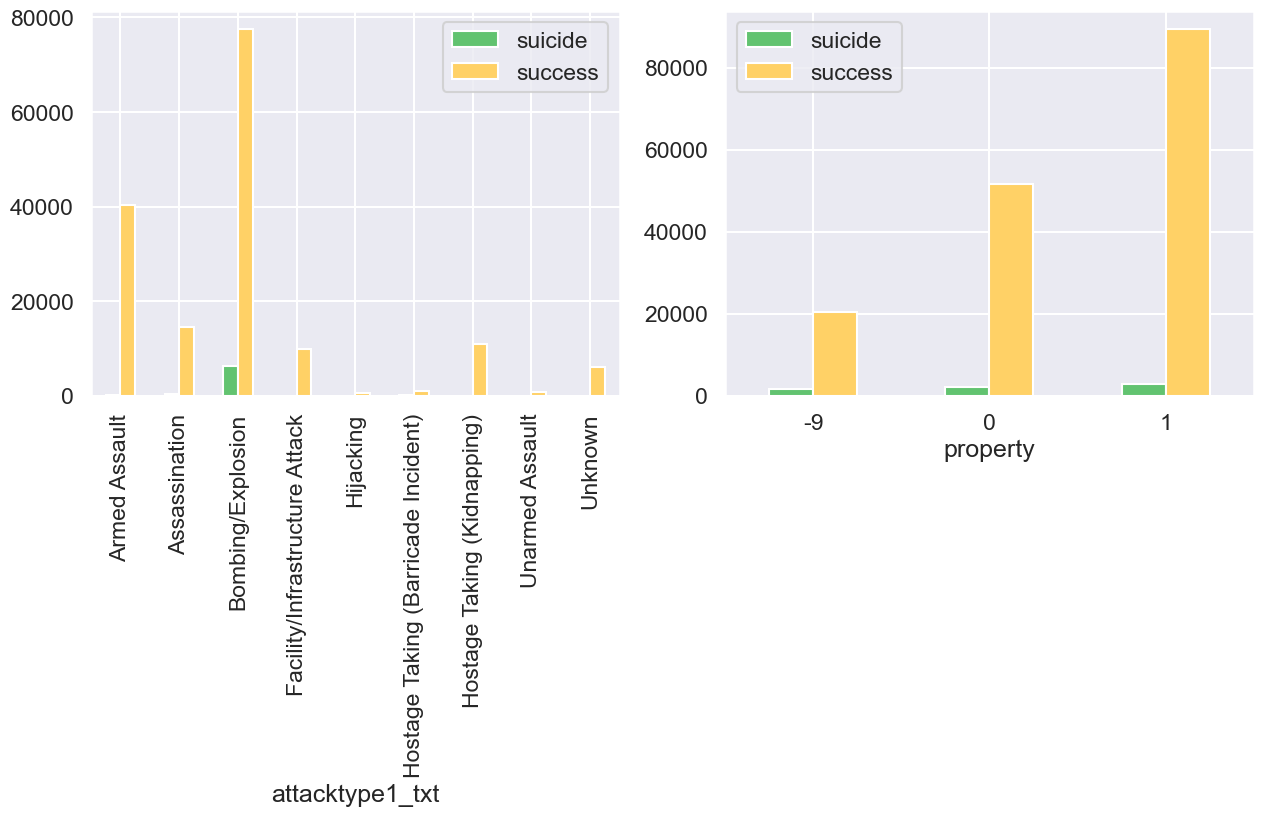

In [42]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
data.groupby('attacktype1_txt')['suicide','success'].agg(sum).plot(kind='bar',ax=axes[0])
data.groupby('property')['suicide','success'].agg(sum).plot(kind='bar',ax=axes[1])
plt.xticks(rotation=360)
plt.show()

<AxesSubplot:xlabel='weaptype1', ylabel='targtype1'>

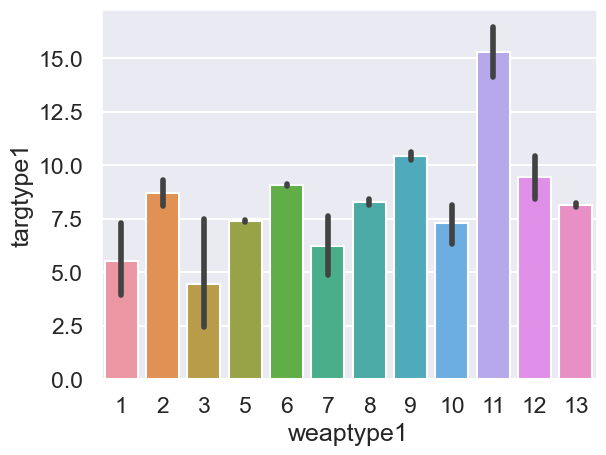

In [41]:
sns.barplot(y=data['targtype1'], x=data['weaptype1'])

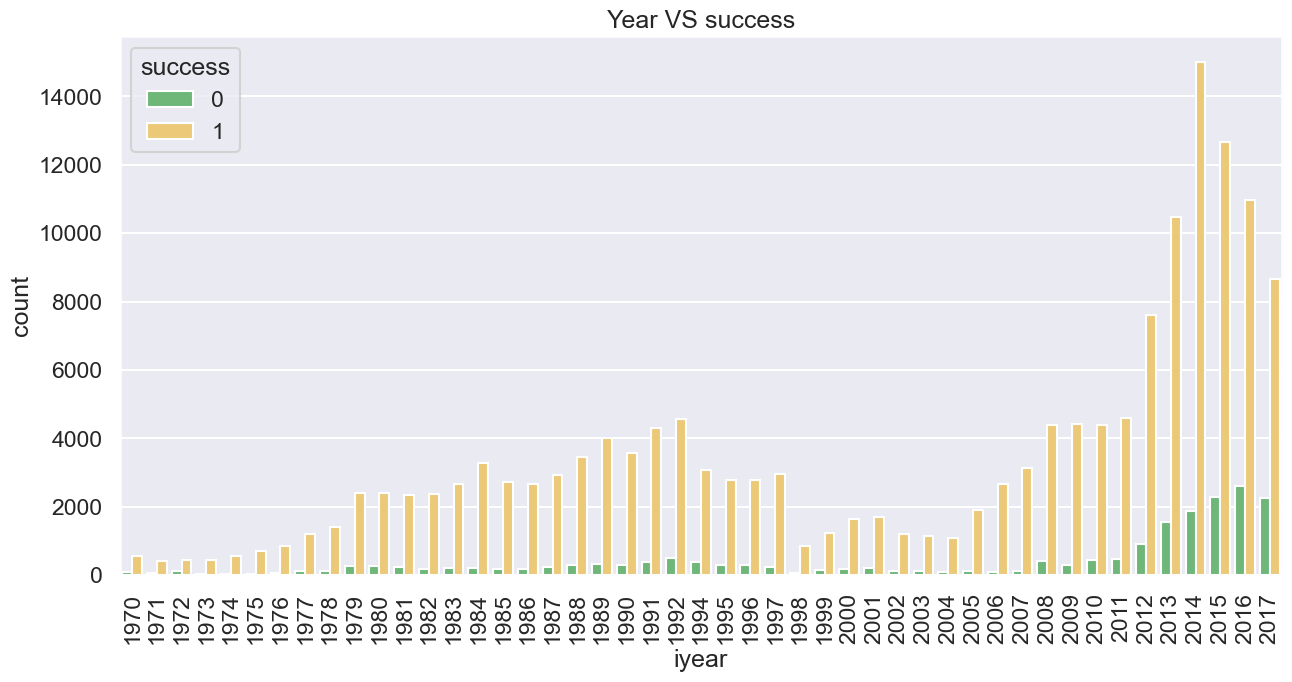

In [43]:
fig,axes=plt.subplots(1,1,figsize=(15,7))
sns.countplot(data['iyear'],hue=data['success'])
plt.xticks(rotation=90)
plt.title('Year VS success')
plt.show()

### EDA

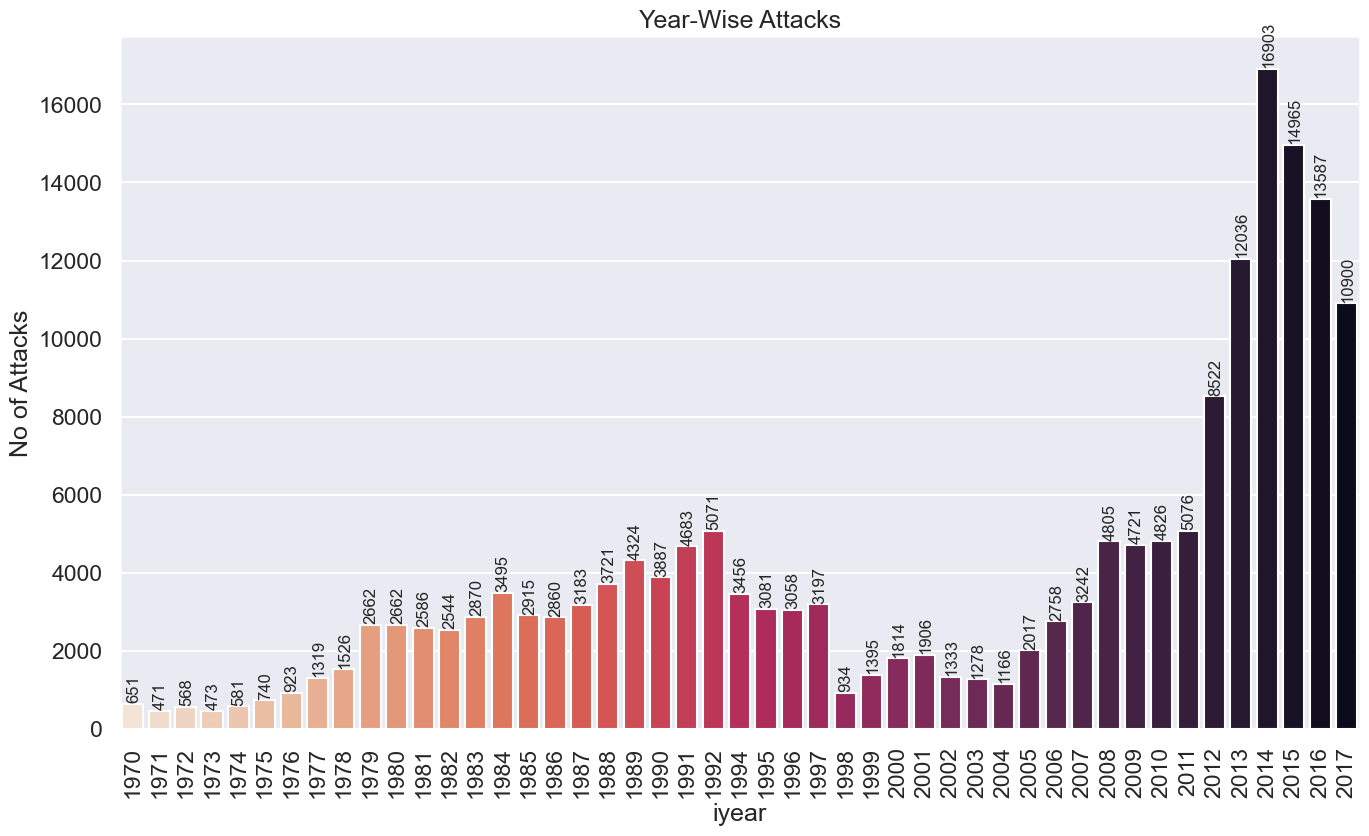

In [20]:
plt.figure(figsize = (16,9))
ax =sns.countplot(data['iyear'], palette = 'rocket_r')
plt.xticks(rotation = 90)
plt.ylabel("No of Attacks") 
plt.title("Year-Wise Attacks")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+100), rotation = 90, size =12)

plt.show()

#### Weapons

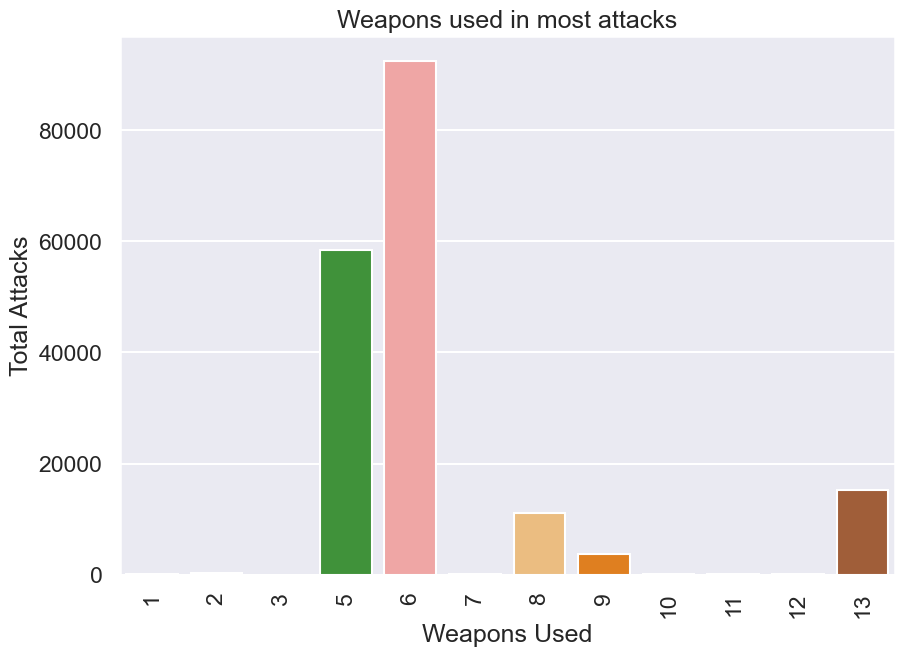

In [24]:
plt.figure(figsize = (10,7))
sns.countplot(data['weaptype1'] , palette = 'Paired')
plt.xticks(rotation = 90)
plt.ylabel("Total Attacks")
plt.xlabel("Weapons Used")
plt.title("Weapons used in most attacks")
plt.show()

Looks like Explosives and Firearms were used in most of the attacks

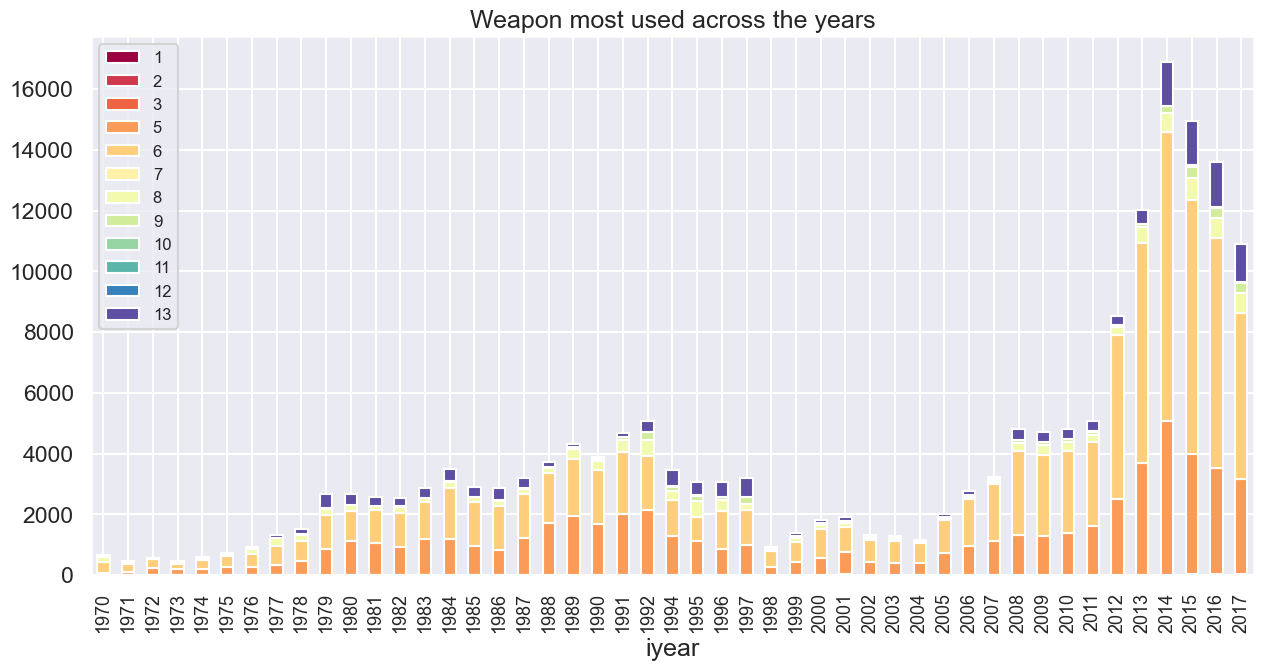

In [27]:
df = data.groupby(['weaptype1', 'iyear']).size().reset_index().pivot(columns='weaptype1', index='iyear', values=0)
df.plot(kind = 'bar', stacked = True, figsize = (15,7), colormap = 'Spectral')
plt.legend(loc=2, prop = {'size':12})
plt.xticks(fontsize = 13)
plt.title("Weapon most used across the years")
plt.show()

Explosives and Firearms remain significant through all the years. The ratio of Explosives to other weapons seem large through the years as it may follow the assumption that the advancement in weapons might causes more attacks.

#### Regions attacked across the years

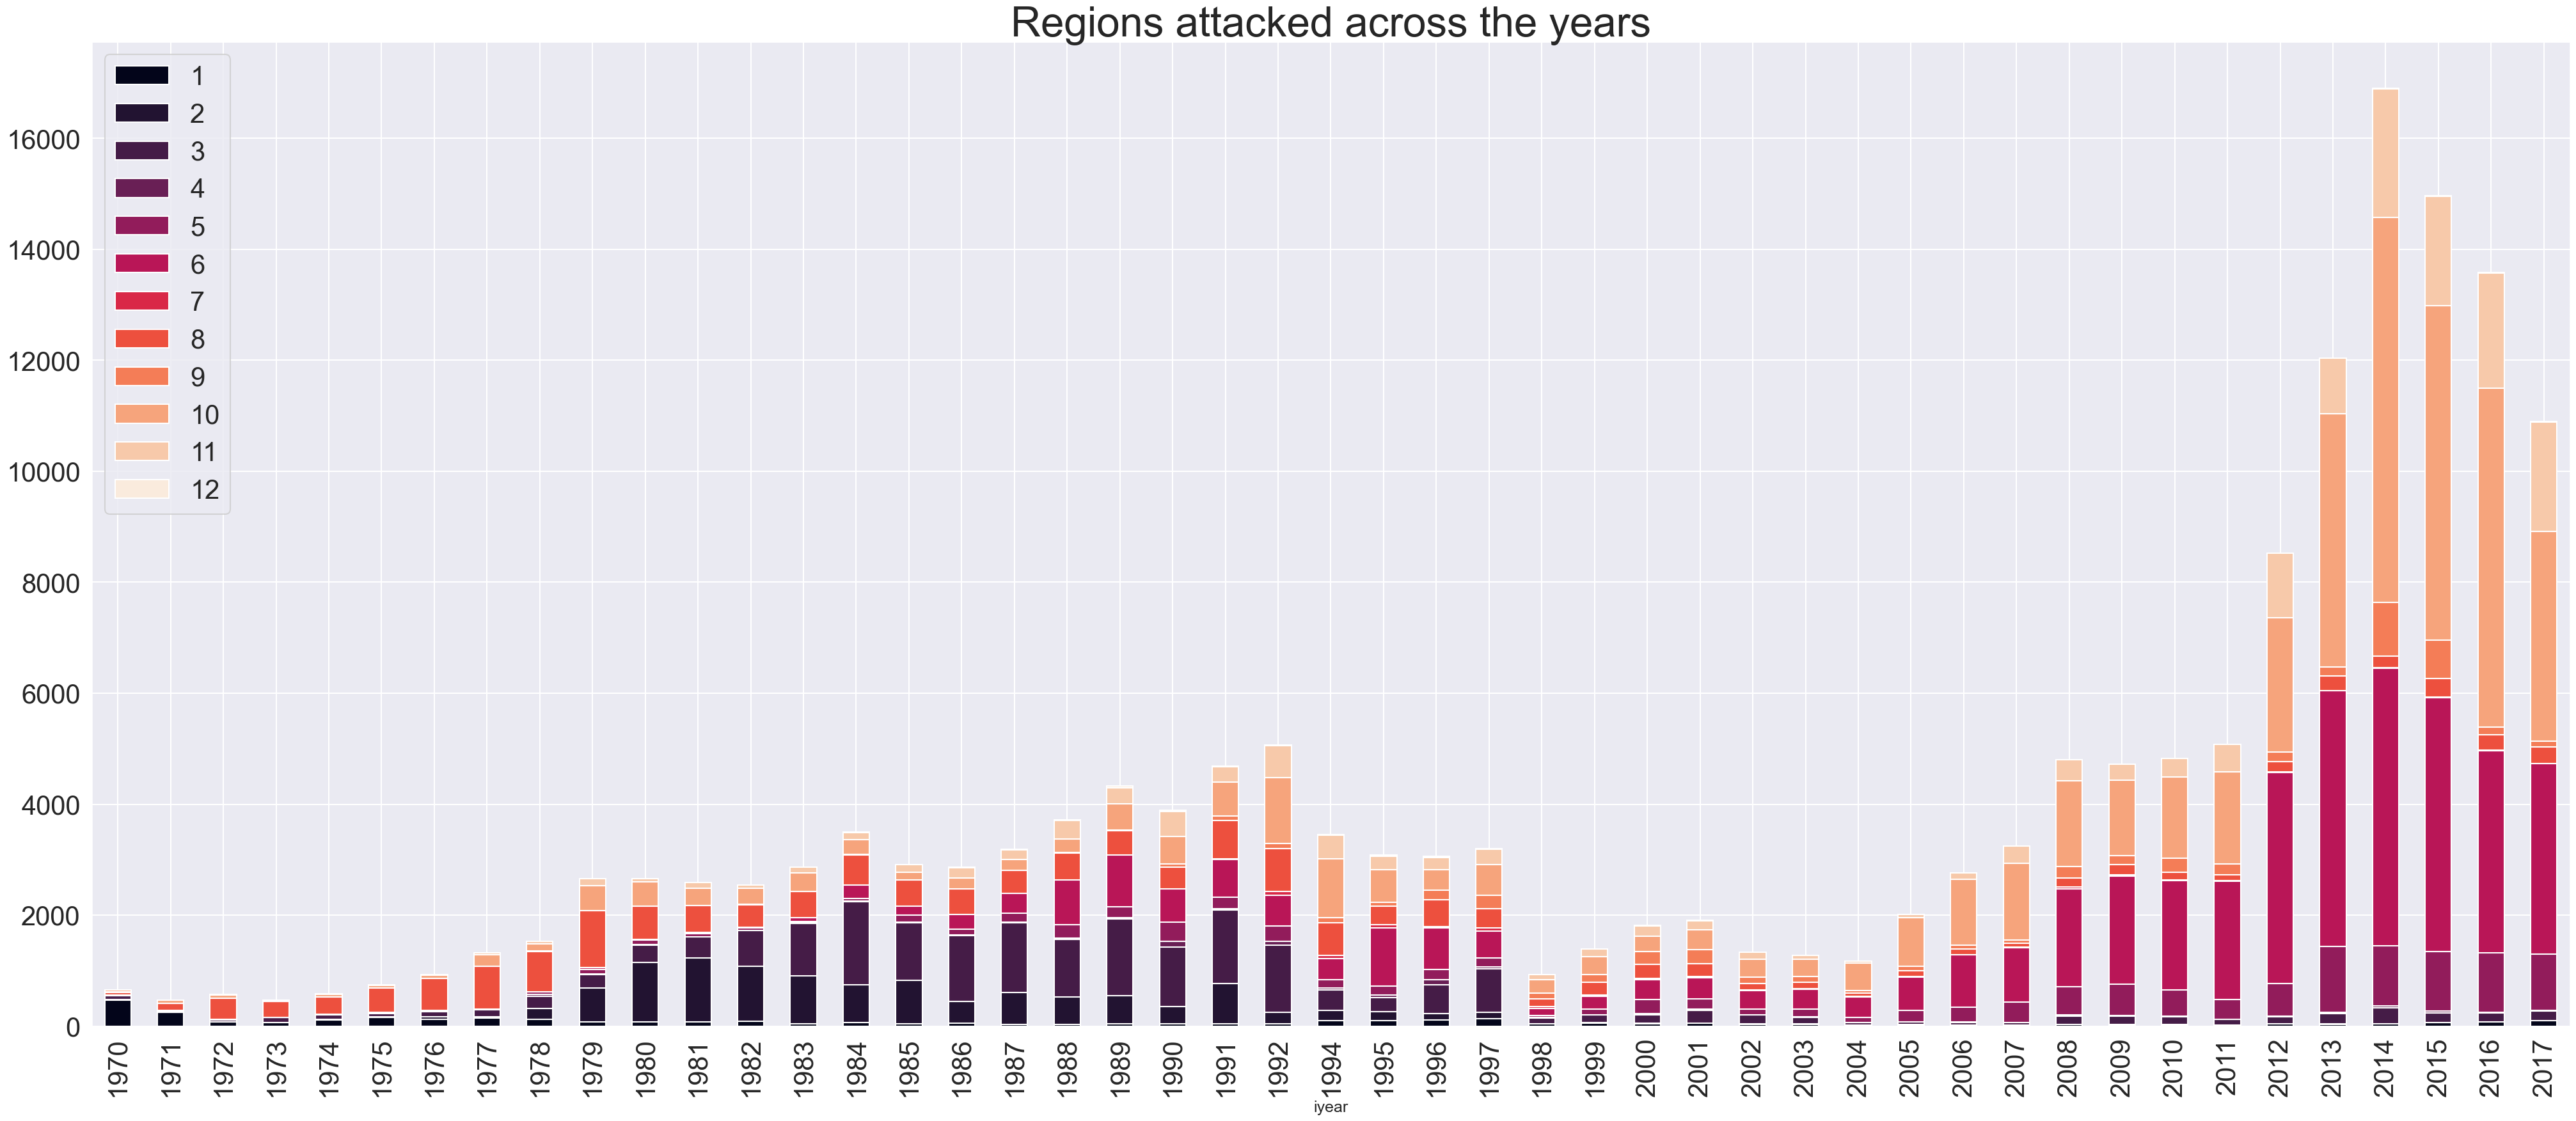

In [31]:
df = data.groupby(['region', 'iyear']).size().reset_index().pivot(columns='region', index='iyear', values=0)
df.plot(kind = 'bar', stacked = True, figsize = (50,20), colormap = 'rocket')
plt.legend(loc=2, prop = {'size':30})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.title("Regions attacked across the years", fontsize = 47)
plt.show()

Attacks seem to be significant in south america around the 1980s

In the 2000s, Middle East, North Africa and South Asian regions seem to have experienced most attacks, and hence need to accommodate multiple security reforms.

### Most common Targets

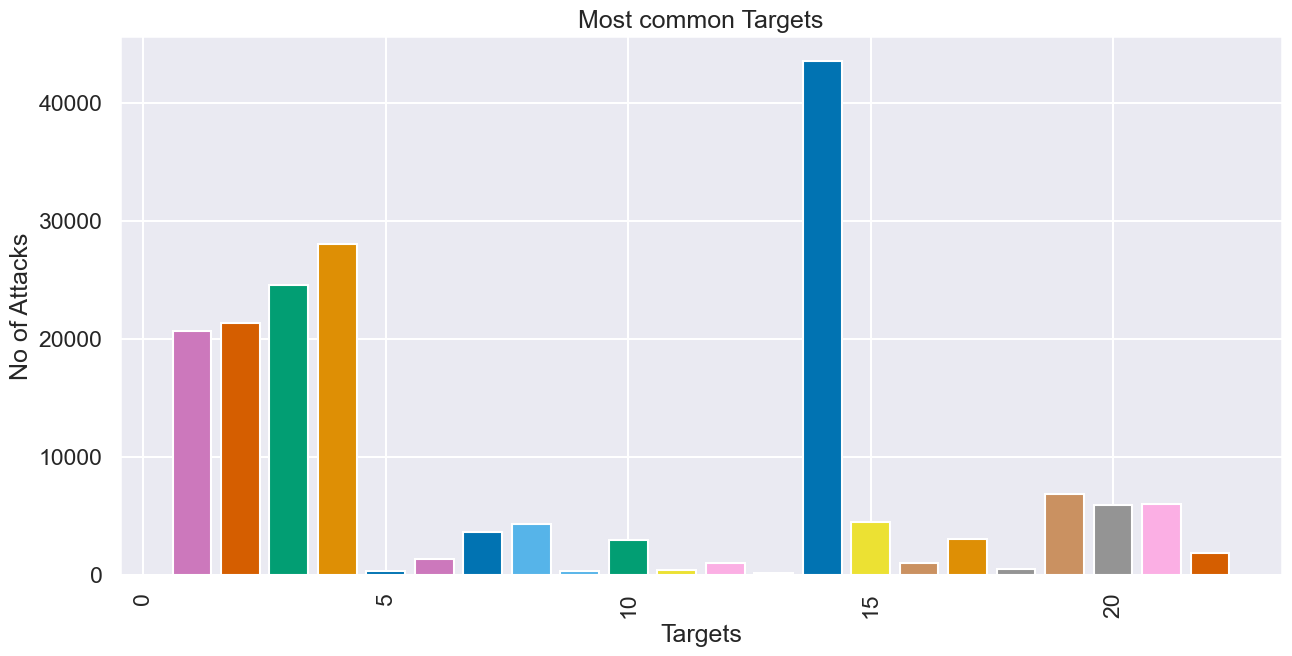

In [33]:
plt.figure(figsize = (15,7))
plt.bar(x = data['targtype1'].value_counts().index[:25], height = data['targtype1'].value_counts()[:25], color = sns.color_palette('colorblind'))
plt.xlabel("Targets")
plt.xticks(rotation = 90)
plt.ylabel("No of Attacks")
plt.title("Most common Targets")
plt.show()

Civilians appear to be the most targetted. Unknown Targets are the second highest as the motive of the perpetrators might not have been clear for the authorities.

## Countries Affected By Terrorist Attacks

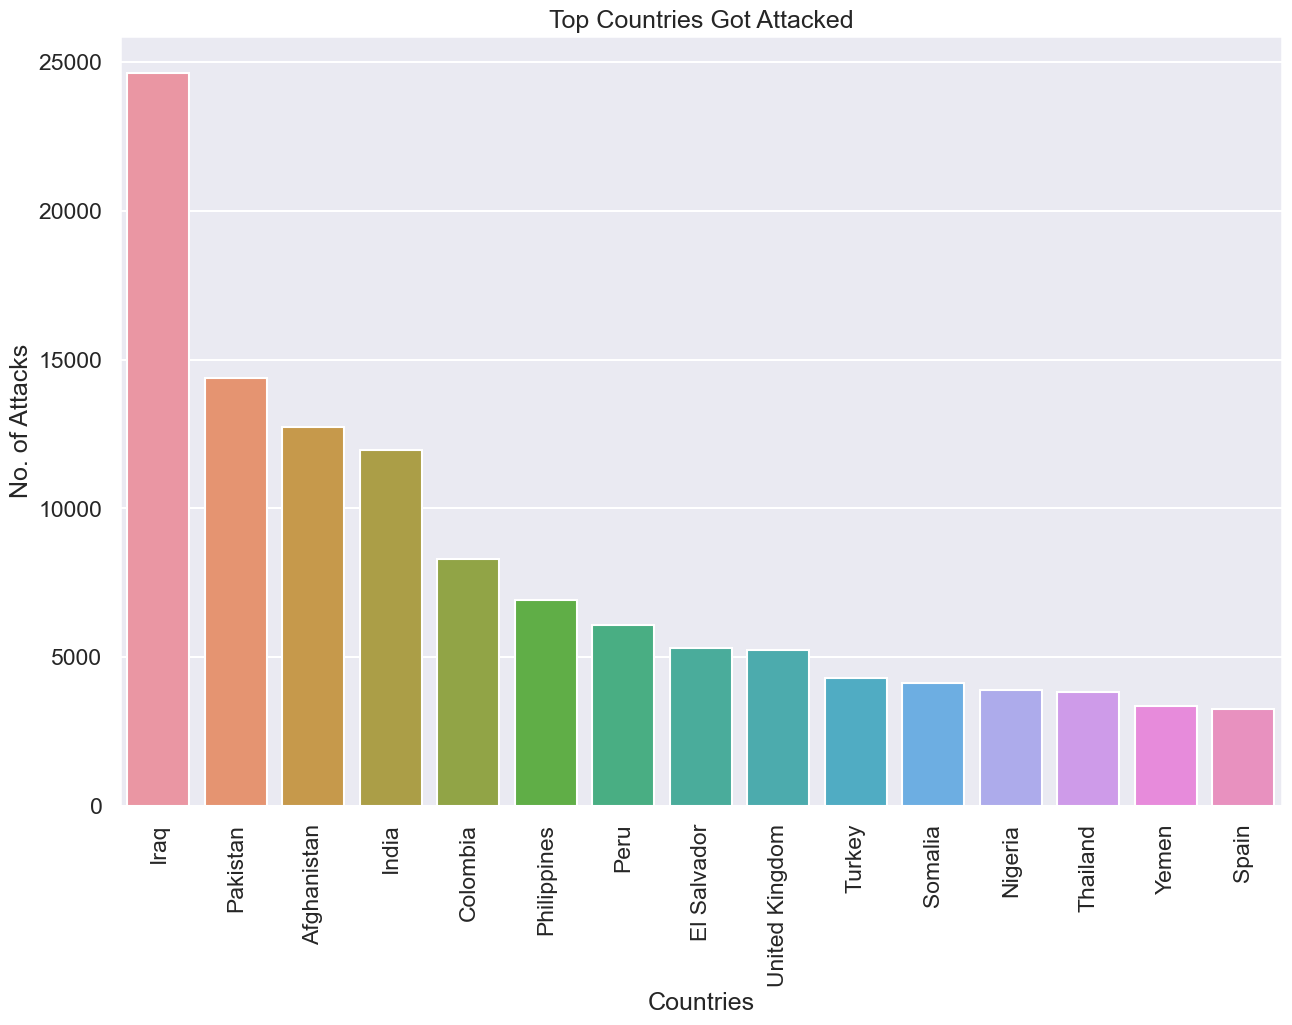

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(x=data['country_txt'].value_counts()[:15].index,y=data['country_txt'].value_counts()[:15].values)
plt.xticks(rotation=90)
plt.title('Top Countries Got Attacked')
plt.xlabel('Countries')
plt.ylabel('No. of Attacks')
plt.show()

Above graph shows that these top 15 countries got more attacks from terrorist organisation, in which India comes in top 5 .

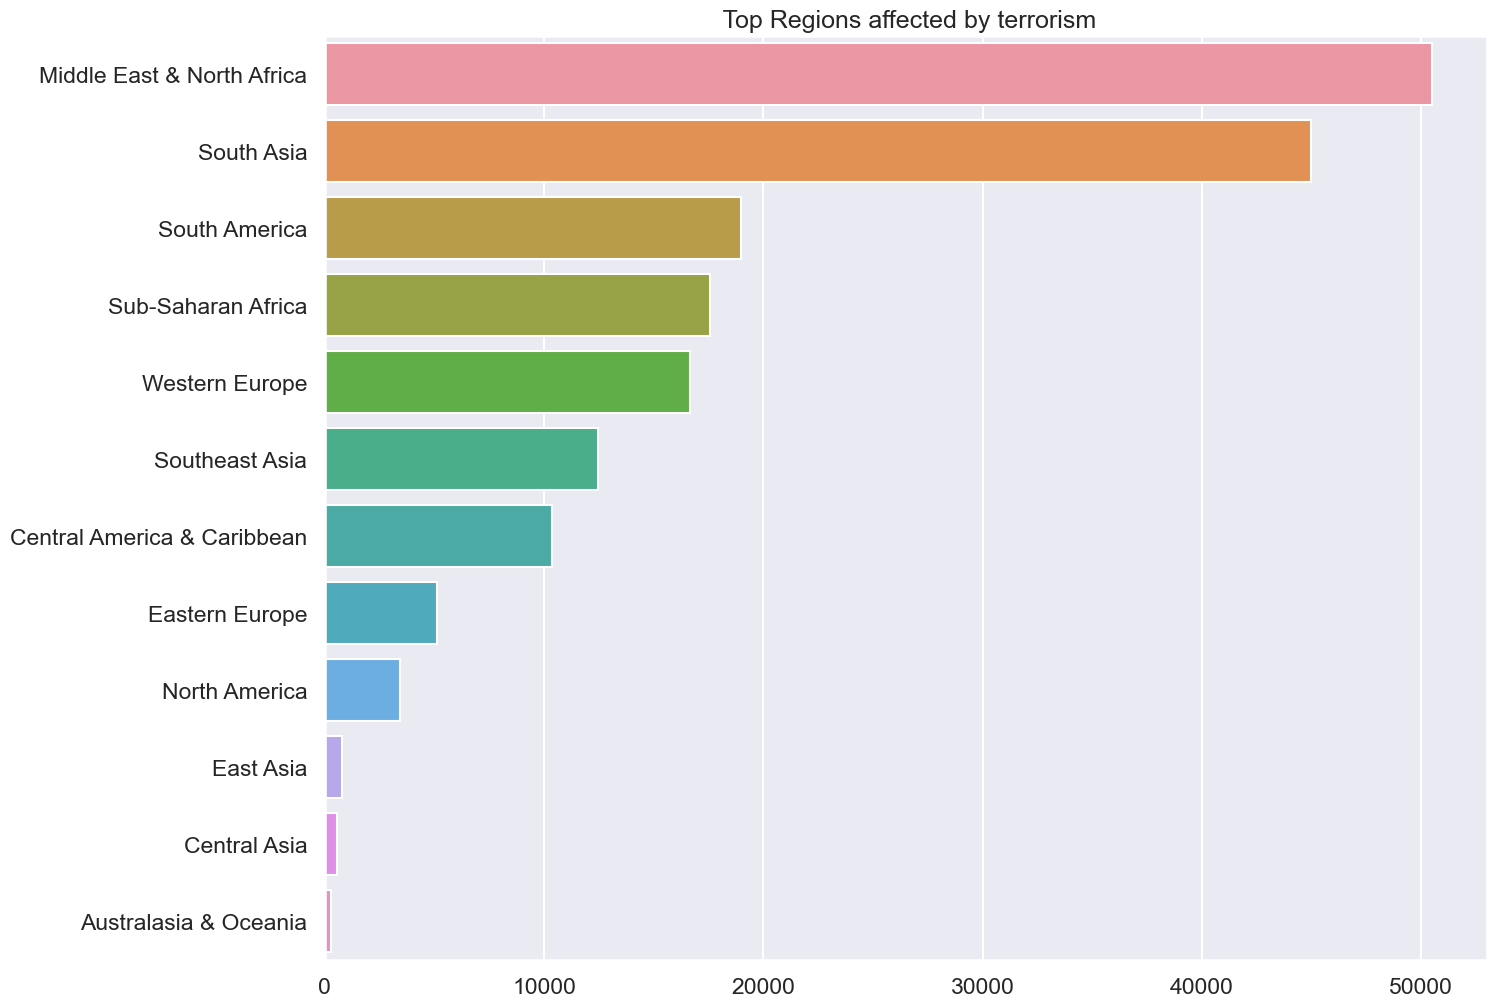

In [45]:
plt.figure(figsize=(15,12))
plt.xticks(rotation=360)
sns.barplot(x=data['region_txt'].value_counts().values,y=data['region_txt'].value_counts().index)
plt.title(' Top Regions affected by terrorism')
plt.show()

From above visualisation we can see that Middle East and North Africa are regions where most terrorist activity occurs.

## Attacks Targets

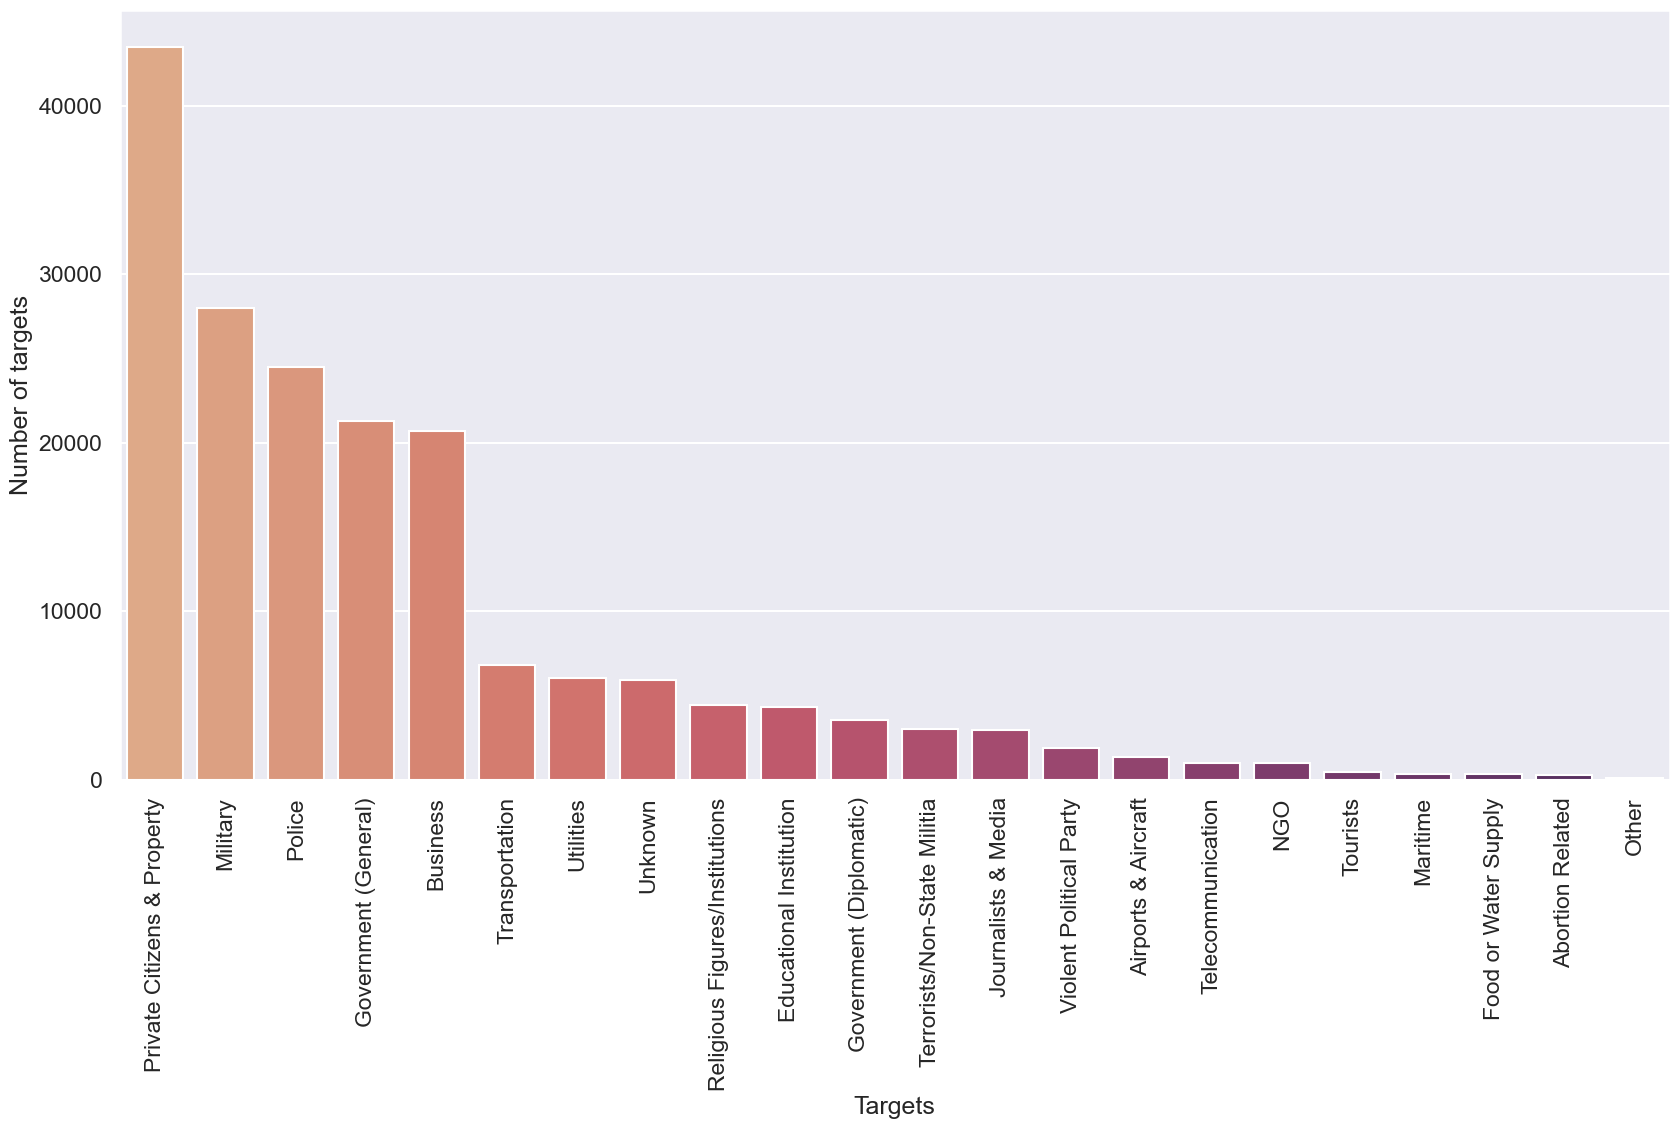

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['targtype1_txt'],order=data['targtype1_txt'].value_counts().index,palette='flare')
plt.xticks(rotation=90)
plt.xlabel('Targets')
plt.ylabel('Number of targets')
plt.show()

From above graph we found that, Private citizens & Property get more affected by terrorism.